In [39]:
from Classifier import knn as knn
from Training import Datacreate as dc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [40]:
LeftEye_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-33-50-YAN-LEFT-EYE/OpenBCI-RAW-2020-10-11_16-38-59.txt"
LeftEye_label_path = "./Recordings/Labels/yanLeftEye"
LeftEye_observations = dc.getObservations(LeftEye_path, LeftEye_label_path, 1000, [0,1,2], 'L_EYE')

y_channels_groups, ind_groups, t_groups, l_groups = LeftEye_observations

-69.40440414507772
-138.75518134715026
-1178.1633678756475
-158.63761658031086
-224.10709844559585
-1164.146269430052


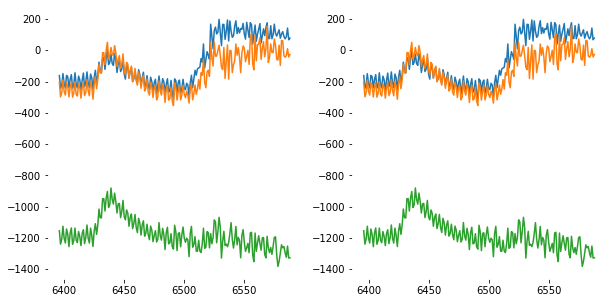

In [67]:
na_ind = 0 #non-action
a_ind = 32 #action
plt.figure(figsize=(10,5))
#plt.ylim([-1400, 0])
for i in range(1):
    plt.subplot(1,2,i+1)
    for channel_groups in y_channels_groups:
                
        ax = plt.gca()
        #ax.axes.xaxis.set_ticks([])
        #ax.axes.yaxis.set_ticks([])
        ax.set_facecolor((1,1,1))
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')
        #plt.ylim([-1400, 200])
        #print(channel_groups[32])
        #print(np.mean(channel_groups[32]))
        cg = np.abs((channel_groups[32]-np.mean(channel_groups[32])))
        print(np.mean(channel_groups[32]))
        plt.plot(ind_groups[32], channel_groups[32])
        #plt.plot(ind_groups[32], cg)
    plt.subplot(1,2,i+2)
    for channel_groups in y_channels_groups:
        ax = plt.gca()
        #ax.axes.xaxis.set_ticks([])
        #ax.axes.yaxis.set_ticks([])
        ax.set_facecolor((1,1,1))
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['right'].set_color('white')
        #plt.ylim([-1400, 200])
        #print(channel_groups[32])
        #print(np.mean(channel_groups[32]))
        cg = np.abs((channel_groups[0]-np.mean(channel_groups[0])))
        print(np.mean(channel_groups[0]))
        plt.plot(ind_groups[0], channel_groups[0])
        #plt.plot(ind_groups[0], cg)